# Factors affecting Duration and types of Users
## by Amro Samaha

## Investigation Overview

> In this investagtion, I searched in depth for factors affecting duration of trips, frequency of trips over time and user types specifically subscriber 

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February 2019 for approx 175,000 ride.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("master.csv")

# conversion to datetime was not written
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
weekend_order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekclasses = pd.api.types.CategoricalDtype(ordered = True, categories = weekend_order)
df['weekday'] = df['weekday'].astype(weekclasses)


df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,weekday,hour,duration_min,log_duration
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,No,35,Thursday,17,869.750000,2.939394
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,47,Thursday,12,1030.900000,3.013217
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,Subscriber,1989,Other,No,30,Thursday,17,608.166667,2.784023
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,Subscriber,1974,Male,Yes,45,Thursday,23,26.416667,1.421878
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,Subscriber,1959,Male,No,60,Thursday,23,29.883333,1.475429


## (Distribution of Ride Duration)

> Distribution of duration in minutes shows that bulk of rides duration is in the range from 4 minutes to 16 minutes. Durations are most frquent in the range from 6 and half minutes to 11 and a half minutes.

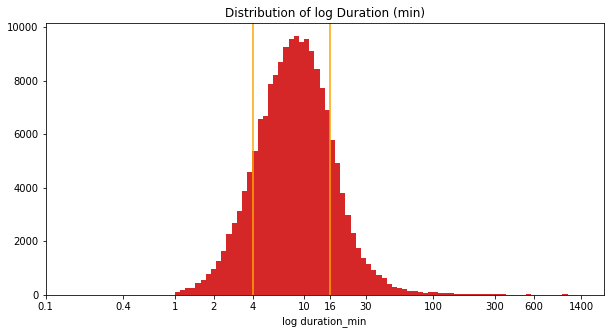

In [3]:
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
plt.figure(figsize=[10,5])

bin_size = 0.04
bins = np.arange(0, df['log_duration'].max() + bin_size, bin_size)
plt.hist(data=df, x= 'log_duration' , bins=bins, color= sb.color_palette()[3]);



plt.xlabel("log duration_min")
plt.title("Distribution of log Duration (min)")

ticks = [0.1, 0.4,  1 , 2, 4, 10, 16, 30, 100, 300, 600, 1400]
tick_locs = log_trans(np.array(ticks))
labels = ['{}'.format(v) for v in ticks]


# Apply x-ticks
plt.xticks(tick_locs, labels);

# highlight boundaries observed from duration_sec log scale
# NOTE: true values on x-axis is np.log10()
plt.axvline(log_trans(4),color = 'orange')
plt.axvline(log_trans(16), color = 'orange');

## (Counts of User types)

> Vast majority of rides by Users are for Subscribers

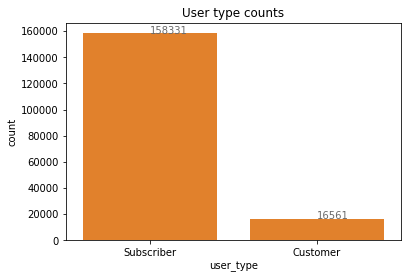

In [4]:
user_count = df.user_type.value_counts()

# plot Count of user_count column

sb.countplot(data= df, x= 'user_type', order= user_count.index, color= sb.color_palette()[1]);

for i in range(user_count.shape[0]):
    count = user_count[i]
    plt.text(i, count, count, color = 'dimgray')

plt.title("User type counts");

## (User type by Gender)

> Subscribers are vast majority Males, then Females then Other.

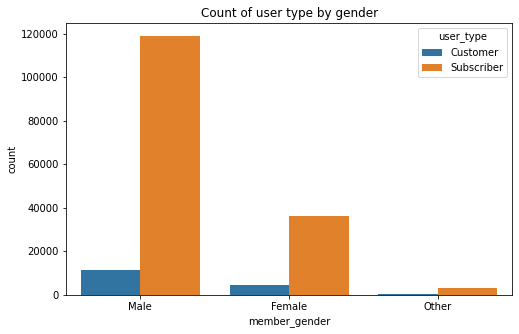

In [5]:
plt.figure(figsize=[8,5])

# order was not set right 
sb.countplot(data = df, x = 'member_gender', hue = 'user_type', order = ['Male', 'Female', 'Other'])
plt.title("Count of user type by gender");

## (Count of Users over the days)

> Number of Subscribers and Customers is constantly increasing during weekdays with a peak on Thursday with lowest counts on weekends. Number of Subscribers for day of month is in a continous shift between decrease and increase. Number of Subscribers had a strong increase on Day 4 that kept growing until a drop on day 8, same pattern happens on day 18 until day 23. Three Peaks of Subscribers occur at days 8, 20 and highest peak on day 28.

In [6]:
users_by_day = df.groupby(df.start_time.dt.day)['user_type'].value_counts()
# divide users type by day

# xs used for multi-index supplied with key -  level 0 is index 0 column 
subscriber_by_day = users_by_day.xs('Subscriber', level=1, drop_level=False)
# customer count by day
customer_by_day = users_by_day.xs('Customer', level=1, drop_level=False)


# creates dfs for subscriber and customer
subscriber_by_day = subscriber_by_day.reset_index(name= 'count')
customer_by_day = customer_by_day.reset_index(name= 'count')

subscriber_by_day.columns = ['day_number', 'user_type', 'count']
customer_by_day.columns = ['day_number', 'user_type', 'count']

subscriber_by_day.head()

,day_number,user_type,count
0,1,Subscriber,5353
1,2,Subscriber,2627
2,3,Subscriber,2396
3,4,Subscriber,4905
4,5,Subscriber,7549


In [7]:
# count of each user type by weekday
users_weekday = df.groupby(df.weekday)['user_type'].value_counts()

# xs used for multi-index supplied with key from index to keep -  level 0 is index 0 column 
subscriber_weekday = users_weekday.xs('Subscriber', level=1, drop_level=False)
# customer count by weekday
customer_weekday = users_weekday.xs('Customer', level=1, drop_level=False)


# creates dfs for subscriber and customer
subscriber_weekday = subscriber_weekday.reset_index(name= 'count')
customer_weekday = customer_weekday.reset_index(name= 'count')

# rename columns to avoid confusion
subscriber_weekday.columns = ['weekday', 'user_type', 'count']
customer_weekday.columns = ['weekday', 'user_type', 'count']

# set order of weekdays as index (could use categorical) 
'''
if type is not categorical could pass order using .loc[]
subscriber_weekday = subscriber_weekday.set_index('weekday').loc[weekend_order]
customer_weekday = customer_weekday.set_index('weekday').loc[weekend_order]'''

subscriber_weekday = subscriber_weekday.set_index('weekday')
customer_weekday = customer_weekday.set_index('weekday')
subscriber_weekday.head()

,user_type,count
weekday,,
Monday,Subscriber,23324
Tuesday,Subscriber,28305
Wednesday,Subscriber,26307
Thursday,Subscriber,30840
Friday,Subscriber,25110


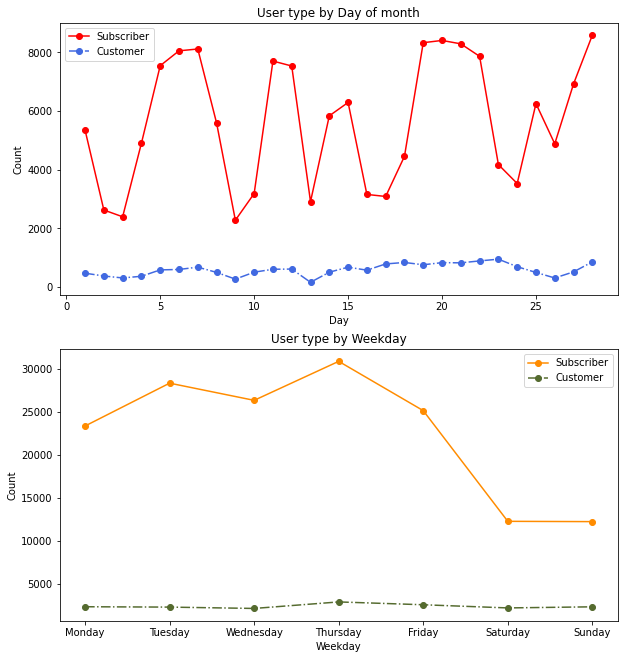

In [8]:
plt.figure(figsize=[10,11])

# plot for user type by day of month
plt.subplot(2,1,1)


# sb.pointplot would difficult adding labels
# Note: marker = , linestyle= instead of style = '-ro'
plt.plot(subscriber_by_day['day_number'], subscriber_by_day['count'], color = 'red', label = 'Subscriber', marker='o', linestyle='solid')
plt.plot(customer_by_day['day_number'], customer_by_day['count'], color = 'royalblue', label = 'Customer', marker='o', linestyle='dashdot')

# could add index start = 1
plt.title("User type by Day of month")
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend();
# plot for user type by weekday 
plt.subplot(2,1,2)
# plot has no order attribute so set weekday index
plt.plot(subscriber_weekday.index, subscriber_weekday['count'], color = 'darkorange', label = 'Subscriber', marker='o', linestyle='solid')
plt.plot(customer_weekday.index, customer_weekday['count'], color = 'darkolivegreen', label = 'Customer', marker='o', linestyle='dashdot')

plt.title("User type by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.legend();

## (Distribution of Duration over hours of the day)

> Most rides are in morning rush hours from 7 AM to 10 AM, and afternoon rush hours from 4PM to 7PM, where majority of durations lie in the range of 4 to 16 mins with peak at approx 10 mins. Long durations are more frequent during night hours of the day.   

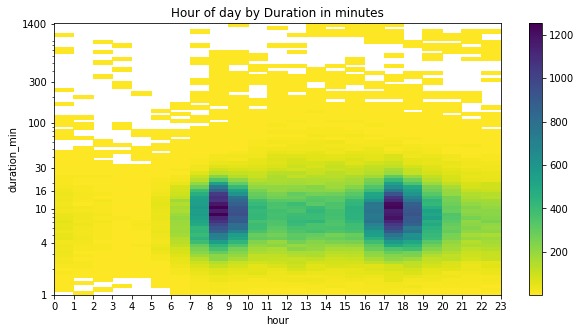

In [9]:
plt.figure(figsize = [10,5])
bins_x = np.arange(0, df['hour'].max() + 1, 1)

bin_size = 0.04
bins_y = 10 ** np.arange(0, df['log_duration'].max() + bin_size, bin_size)

plt.hist2d(data = df, x = 'hour', y = 'duration_min', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.yscale('log');

# Notice the areas of high frequency in the middle of the negative trend in the plot.
ticks = [1 , 4, 10, 16, 30, 100, 300, 1400]
labels = ['{}'.format(v) for v in ticks]

plt.yticks(ticks, labels)
#plt.xlim(1,40);
plt.xticks(np.arange(0,24,1))
plt.xlabel('hour')
plt.ylabel('duration_min')
plt.title("Hour of day by Duration in minutes");

## (Average of Duration by User type and Gender)

> Male has the least duration time both subscriber and customers. Female exceeds male in the duration of trips while Other has highest duration time on average. Customer have on average longer rides than Subscribers across all Genders, exceeding with approx 10 mins on average.  

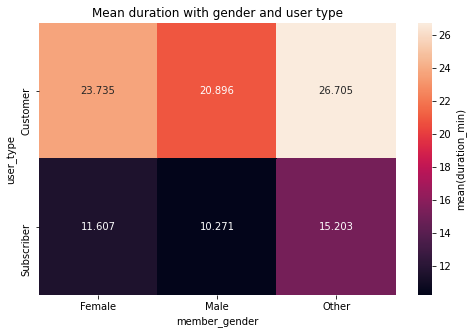

In [10]:
#plot mean duration_min given member_gender and user_type
plt.figure(figsize=[8,5])
means = df.groupby(['user_type', 'member_gender']).mean()['duration_min']
means = means.reset_index(name = 'duration_min_avg')
means = means.pivot(index = 'user_type', columns = 'member_gender',values = 'duration_min_avg')
sb.heatmap(means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min)'})
plt.title("Mean duration with gender and user type");